In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
%matplotlib inline

sns.set_theme()
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams["axes.grid"] = True

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

# Load + Parse Excel files

In [2]:
pd.read_excel('treasury_data.xlsx')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaT,US Treasury Actives Curve - 6M,US Treasury Actives Curve - 6M,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,Discount price,Modified Duration,NaN,NaN,Bond,From,To
2,NaN,2022-10-14,97.9542,0.477695,912796YU Govt,NaN,912796YU Govt,2022-10-12 00:00:00,2022-10-14 00:00:00
3,NaN,2022-10-13,97.9223,0.485587,912796YU Govt,NaN,912796YN Govt,2022-10-04 00:00:00,2022-10-11 00:00:00
4,NaN,2022-10-12,97.9727,0.488522,912796YU Govt,NaN,912796YM Govt,2022-09-27 00:00:00,2022-10-03 00:00:00
...,...,...,...,...,...,...,...,...,...
6725,NaN,1997-01-07,NaN,NaN,#N/A Tenor,NaN,NaN,NaN,NaN
6726,NaN,1997-01-06,NaN,NaN,#N/A Tenor,NaN,NaN,NaN,NaN
6727,NaN,1997-01-03,NaN,NaN,#N/A Tenor,NaN,NaN,NaN,NaN
6728,NaN,1997-01-02,97.307,0.485204,GB6 Govt,NaN,NaN,NaN,NaN


In [57]:
sheets = [str(y) for y in range(1997, 2023)]

## Read meta data

In [58]:
def read_meta(sheet):
    df = pd.read_excel('treasury_data.xlsx', sheet_name=sheet, header=None, nrows=11) \
        .T.iloc[1:, [1,2,3,4,5,-1]].T.set_index(1).T.rename(columns={np.NaN: 'ID'}) \
        .rename_axis(columns=None).set_index('ID').convert_dtypes()

    df['Issue Date'] = pd.to_datetime(df['Issue Date'])
    df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])
    return df 

In [59]:
meta_2022 = read_meta('2022')

In [60]:
meta_2022.dtypes

Issue Date        datetime64[ns]
Maturity Date     datetime64[ns]
Diff                       Int64
Issue Discount           Float64
Issue Price              Float64
dtype: object

In [61]:
meta_2022.head()

,Issue Date,Maturity Date,Diff,Issue Discount,Issue Price
ID,,,,,
912796R5 Govt,2021-12-30,2022-06-30,182,0.605,99.698329
912796R6 Govt,2022-01-06,2022-07-07,182,0.67,99.665918
912796K5 Govt,2021-07-15,2022-07-14,364,0.785,99.217151
912796S4 Govt,2022-01-20,2022-07-21,182,0.86,99.571178
912796S5 Govt,2022-01-27,2022-07-28,182,0.89,99.556219


In [89]:
metas = {s: read_meta(s) for s in sheets}

## Read prices

In [68]:
def read_price(s):
    return pd.read_excel('bond_data.xlsx', sheet_name=s, header=10) \
        .drop(columns='Unnamed: 0') \
        .rename(columns={'Unnamed: 1': 'date'}).set_index('date')

In [69]:
prices_2022 = read_price('2022')

In [70]:
prices_2022.dtypes.head()

912796R5 Govt    float64
912796R6 Govt    float64
912796K5 Govt    float64
912796S4 Govt    float64
912796S5 Govt    float64
dtype: object

In [71]:
prices_2022.head()

,912796R5 Govt,912796R6 Govt,912796K5 Govt,912796S4 Govt,912796S5 Govt,912796S6 Govt,912796L6 Govt,912796T4 Govt,912796T5 Govt,912796T6 Govt,...,912796XZ Govt,912796YA Govt,912796T3 Govt,912796YB Govt,912796YK Govt,912796YL Govt,912796U3 Govt,912796YM Govt,912796YN Govt,912796YU Govt
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,99.9066,99.8973,99.9125,NaN,NaN,NaN,99.8935,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,99.9108,99.8951,99.9103,NaN,NaN,NaN,99.8819,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,99.9040,99.8888,99.9029,NaN,NaN,NaN,99.8764,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,99.8997,99.8869,99.8851,NaN,NaN,NaN,99.8665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,99.9062,99.8875,99.8767,NaN,NaN,NaN,99.8654,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
prices = {s: read_price(s) for s in sheets}

# Analyse

In [90]:
ss = set()
for m in metas.values():
    ss |= set(m.index)

In [91]:
# de-duplicated, unprocessed
len(ss), sum(len(s.index) for s in metas.values())

(1322, 1351)

In [92]:
# merge and dedup contract infos
meta = pd.concat(metas.values())
meta = meta[~meta.index.duplicated()]

In [104]:
meta.shape

(1322, 5)

In [105]:
meta.head()

,Issue Date,Maturity Date,Diff,Issue Discount,Issue Price
ID,,,,,
9127945H Govt,1997-02-06,1997-08-07,182,5.14,97.437041
9127945J Govt,1997-02-13,1997-08-14,182,5.08,97.466959
9127942T Govt,1996-08-22,1997-08-21,364,5.17,94.844164
9127945K Govt,1997-02-27,1997-08-28,182,5.03,97.49189
9127945L Govt,1997-03-06,1997-09-04,182,4.93,97.541753


In [106]:
meta[meta['Diff'] < 200]

,Issue Date,Maturity Date,Diff,Issue Discount,Issue Price
ID,,,,,
9127945H Govt,1997-02-06,1997-08-07,182,5.14,97.437041
9127945J Govt,1997-02-13,1997-08-14,182,5.08,97.466959
9127945K Govt,1997-02-27,1997-08-28,182,5.03,97.49189
9127945L Govt,1997-03-06,1997-09-04,182,4.93,97.541753
9127945M Govt,1997-03-13,1997-09-11,182,4.94,97.536767
...,...,...,...,...,...
912796YK Govt,2022-09-08,2023-03-09,182,3.32,98.344548
912796YL Govt,2022-09-15,2023-03-16,182,3.465,98.272247
912796YM Govt,2022-09-29,2023-03-30,182,3.85,98.080274


In [109]:
price_sparse = pd.concat([p.stack() for p in prices.values()]).unstack()

In [112]:
price_sparse.shape, price_sparse.shape[0] * price_sparse.shape[1]

((6723, 1326), 8914698)

In [113]:
price_sparse.count().sum()

156567

In [123]:
meta.loc['912795QC Govt']

Issue Date        2003-12-11 00:00:00
Maturity Date     2004-06-10 00:00:00
Diff                              182
Issue Discount                  0.895
Issue Price                 99.553726
Name: 912795QC Govt, dtype: object

In [137]:
price_6m = price_sparse.loc[:, list(set(meta[meta['Diff'] < 200].index) - set(('912795QC Govt',)))]

In [132]:
(price_sparse >= 100).sum().sum()

3790

In [136]:
price_sparse.stack()[price_sparse.stack() > 100]

date                     
2008-12-04  912795J3 Govt    100.0004
            912795J4 Govt    100.0012
            912795J5 Govt    100.0070
            912795J6 Govt    100.0009
            912795J7 Govt    100.0023
                               ...   
2021-12-31  912796C3 Govt    100.0010
            912796D3 Govt    100.0011
            912796K8 Govt    100.0006
            912796K9 Govt    100.0004
            912796L7 Govt    100.0003
Length: 1953, dtype: float64

In [184]:
meta.loc[price_6m.loc[:, price_6m.min() < 97].columns]

,Issue Date,Maturity Date,Diff,Issue Discount,Issue Price
912795FH Govt,2000-05-25,2000-11-24,183,6.11,96.93663
912795GE Govt,2000-11-02,2001-05-03,182,4.98,97.516822
912795FP Govt,2000-07-20,2001-01-18,182,6.08,96.968329
912795FQ Govt,2000-07-27,2001-01-25,182,6.16,96.928438
912795GD Govt,2000-10-26,2001-04-26,182,5.09,97.461973
912795GC Govt,2000-10-19,2001-04-19,182,4.95,97.531781
912795GG Govt,2000-11-16,2001-05-17,182,4.9,97.556712
912795FU Govt,2000-08-24,2001-02-22,182,6.175,96.920959
912795FY Govt,2000-09-21,2001-03-22,182,5.77,97.122904
912795FJ Govt,2000-06-01,2000-11-30,182,6.14,96.938411


In [162]:
price_6m.loc[:, price_6m.min() < 97].dropna(how='all')

,912795FH Govt,912795GE Govt,912795FP Govt,912795FQ Govt,912795GD Govt,912795GC Govt,912795GG Govt,912795FU Govt,912795FY Govt,912795FJ Govt,912795FS Govt,912795GH Govt,912795FK Govt,912795FT Govt,912795FF Govt,912795FM Govt,912795FG Govt,912795GA Govt,912795FX Govt,912795FW Govt,912795GF Govt,912795GB Govt,912795FZ Govt,912795FN Govt
date,,,,,,,,,,,,,,,,,,,,,,,,
2000-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.9970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.9869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.9959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: ylabel='Count'>

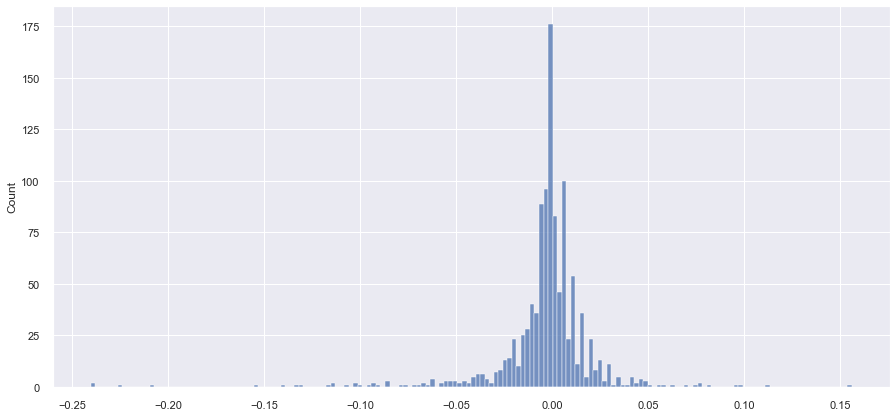

In [148]:
sns.histplot(data=price_6m.diff().cumsum().min())

<AxesSubplot: ylabel='Count'>

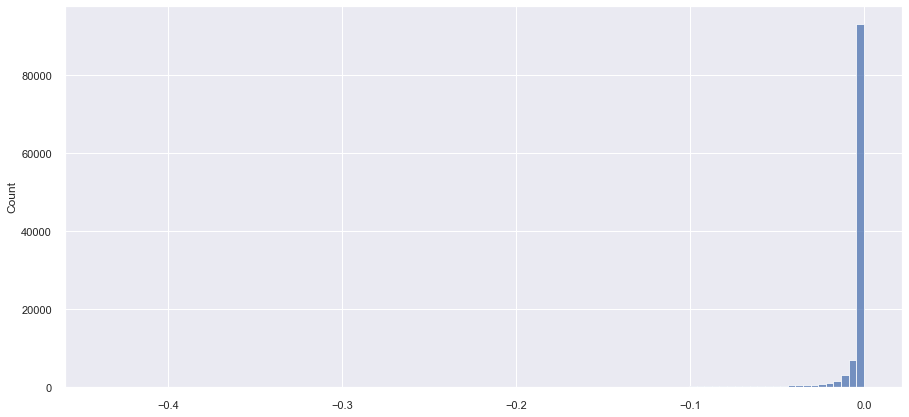

In [179]:
sns.histplot((price_6m - price_6m.cummax()).stack(), bins=100)

<AxesSubplot: ylabel='Count'>

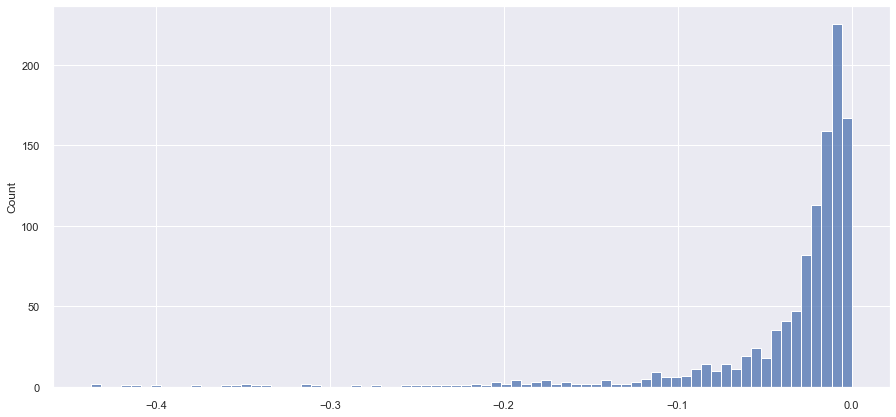

In [175]:
sns.histplot((price_6m - price_6m.cummax()).min())